<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Socio%20Formador/C%C3%B3digo/P11_v11/SF_Extraccion_Caracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paso 0 **Cargar info y librerias**

In [2]:
#Instalamos librebria para analisis de variables categoricas
%pip install funpymodeling

  Using cached funpymodeling-0.1.9-py3-none-any.whl.metadata (1.3 kB)
  Using cached flake8-6.1.0-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached pre_commit-3.8.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mccabe-0.7.0-py2.py3-none-any.whl.metadata (5.0 kB)
  Using cached pycodestyle-2.11.1-py2.py3-none-any.whl.metadata (4.5 kB)
  Using cached pyflakes-3.1.0-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached jupyterlab-4.2.5-py3-none-any.whl.metadata (16 kB)
  Using cached cfgv-3.4.0-py2.py3-none-any.whl.metadata (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 5.8 MB/s eta 0:00:00
  

In [3]:
#Importamos las librerias pandas, numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [4]:
data= pd.read_csv('datos_limpios_sf_iqr.csv')

In [5]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13803 entries, 0 to 13802
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Veloc   13803 non-null  float64
 1   Acele   13803 non-null  float64
 2   Des_x   13803 non-null  float64
 3   Des_y   13803 non-null  float64
 4   Des_z   13803 non-null  float64
 5   Presn   13803 non-null  float64
 6   VelPr   13803 non-null  float64
 7   AcePr   13803 non-null  float64
 8   F5EEX   13803 non-null  float64
 9   F6EES   13803 non-null  float64
 10  F8EIX   13803 non-null  float64
 11  F7EIS   13803 non-null  float64
 12  F9EEX   13803 non-null  float64
 13  F10ES   13803 non-null  float64
 14  F11EX   13803 non-null  float64
 15  F12ES   13803 non-null  float64
 16  F13EV   13803 non-null  float64
 17  F14EV   13803 non-null  float64
 18  F17MS   13803 non-null  float64
 19  F18MX   13803 non-null  float64
 20  F15MS   13803 non-null  float64
 21  F16MX   13803 non-null  float64
 22

# Paso 1 **Preprocesamiento**

In [8]:
data_copia=data.copy()

In [9]:
data_cansancio= data[data['01_C']==1]
data_cansancio.shape

(0, 32)

In [10]:
data_ansiedad= data[data['02_A']==1]
data_ansiedad.shape

(0, 32)

In [11]:
data_dolor= data[data['03_D']==1]
data_dolor.shape

(0, 32)

In [12]:
data_motivacion= data[data['04_M']==1]
data_motivacion.shape

(13803, 32)


## **Columnas a evaluar:**

a) ***Extracción de características***. Dividir en 4 subdataframes el dataset principal (De acuerdo a cada emoción: (“**Cansancio**”, “**Ansiedad**”, **“Dolor”** y **“Meditación”**),

Categorizar las **20 variables** del **“FAE sensor”** utilizando la **regla de STURGES** y obtener el análisis univariado de cada una, poniendo como etiquetas los rangos obtenidos en cada una de ellas.


In [13]:
data_FAE_motivacion= data_motivacion.iloc[:,8:28]
data_FAE_motivacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13803 entries, 0 to 13802
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F5EEX   13803 non-null  float64
 1   F6EES   13803 non-null  float64
 2   F8EIX   13803 non-null  float64
 3   F7EIS   13803 non-null  float64
 4   F9EEX   13803 non-null  float64
 5   F10ES   13803 non-null  float64
 6   F11EX   13803 non-null  float64
 7   F12ES   13803 non-null  float64
 8   F13EV   13803 non-null  float64
 9   F14EV   13803 non-null  float64
 10  F17MS   13803 non-null  float64
 11  F18MX   13803 non-null  float64
 12  F15MS   13803 non-null  float64
 13  F16MX   13803 non-null  float64
 14  F19MH   13803 non-null  float64
 15  F20MH   13803 non-null  float64
 16  F1EBX   13803 non-null  float64
 17  F2EBS   13803 non-null  float64
 18  F4EBX   13803 non-null  float64
 19  F3EBS   13803 non-null  float64
dtypes: float64(20)
memory usage: 2.1 MB


## **Strungens** FAE

### F5EEX

In [14]:
x='F5EEX'
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F5EEX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [15]:
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
Limites

[0.1508737, 0.71567681]

In [16]:
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
R_2_2

0.56480311

In [17]:
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
ni_1

14.744711980108402

In [18]:
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1
i

0.03830546915816037

In [19]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.0000001,Max_1_1,round(ni_1))
intervalos

array([0.1508736 , 0.19121669, 0.23155977, 0.27190286, 0.31224595,
       0.35258903, 0.39293212, 0.4332752 , 0.47361829, 0.51396138,
       0.55430446, 0.59464755, 0.63499064, 0.67533372, 0.71567681])

In [20]:
#Creamos las categorias
categorias = [
    '[0.1508737] a [0.19121669]', '[0.1912167] a [0.23155977]','[0.23155978] a [0.27190286]','[0.27190287] a [0.31224595]',
    '[0.31224596] a [0.35258903]', '[0.35258904] a [0.39293212]', '[0.39293213] a [0.4332752]', '[0.4332753] a [0.47361829]',
    '[0.4736183] a [0.51396138]', '[0.51396139] a [0.55430446]', '[0.55430447] a [0.59464755]', '[0.59464756] a [0.63499064]',
    '[0.63499065] a [0.67533372]', '[0.67533373] a [0.71567681]'
]



In [21]:
#Finalmente creamos las categorias en la columna numerica
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].head()

<ipython-input-21-e3a8ae75d85a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


,F5EEX
0,[0.4332753] a [0.47361829]
1,[0.4332753] a [0.47361829]
2,[0.39293213] a [0.4332752]
3,[0.4332753] a [0.47361829]
4,[0.4332753] a [0.47361829]


In [22]:
data_FAE_motivacion[x].isnull().sum()

0

### F6EES

In [23]:
x='F6EES'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F6EES
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [24]:
Limites

[0.16665638, 0.73307092]

In [25]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(ni_1))
intervalos

array([0.16665637, 0.20711455, 0.24757273, 0.28803092, 0.3284891 ,
       0.36894728, 0.40940546, 0.44986364, 0.49032183, 0.53078001,
       0.57123819, 0.61169637, 0.65215456, 0.69261274, 0.73307092])

In [26]:
#Creamos las categorias
categorias = [
     '[0.16665638] a [0.20711455]','[0.20711456] a [0.24757273]',
     '[0.24757274] a [0.28803092]','[0.28803093] a [0.3284891]'
     ,'[0.3284892] a [0.36894728]','[0.36894729] a [0.40940546]',
     '[0.40940547] a [0.44986364]','[40940546] a [0.49032183]',
     '[0.49032184] a [0.53078001]', '[0.53078002] a [0.57123819]',
     '[0.5712382] a [0.61169637]', '[0.61169638] a [0.65215456]',
     '[0.65215457] a [0.69261274]', '[0.69261275] a [0.73307092]'
]


In [27]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].head()

<ipython-input-27-378318af9a49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


,F6EES
0,[0.3284892] a [0.36894728]
1,[0.28803093] a [0.3284891]
2,[0.28803093] a [0.3284891]
3,[0.28803093] a [0.3284891]
4,[0.28803093] a [0.3284891]


In [28]:
data_FAE_motivacion[x].isnull().sum()

0

### F8EIX

In [29]:
x='F8EIX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion[x])
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F8EIX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [30]:
Limites

[0.16294045, 0.72473861]

In [31]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,5)
intervalos

array([0.16294044, 0.30338998, 0.44383953, 0.58428907, 0.72473861])

In [32]:
#Creamos las categorias
categorias = [
    '[0.16294044] a [0.30338998]', '[0.30338999] a [0.44383953]','[0.44383954] a [0.58428907]','[0.58428908] a [0.72473861]'
]

In [33]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-33-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F7EIS

In [34]:
x='F7EIS'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion[x])
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F7EIS
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [35]:
Limites

[0.15903821, 0.66533359]

In [36]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(ni_1))
intervalos

array([0.1590382 , 0.19520216, 0.23136611, 0.26753007, 0.30369403,
       0.33985798, 0.37602194, 0.4121859 , 0.44834985, 0.48451381,
       0.52067776, 0.55684172, 0.59300568, 0.62916963, 0.66533359])

In [37]:
#Creamos las categorias
categorias = [
    '[0.15903821]-[0.19520216]','[0.19520217] a [0.23136611]','[0.23136612] a [0.26753007]',
    '[0.26753008] a [0.30369403]','[0.30369404] a [0.33985798]', '[0.33985799] a [0.37602194]',
    '[0.37602195] a [0.4121859]', '[0.412186] a [0.44834985]', '[0.44834986] a [0.48451381]',
    '[0.48451382] a [0.52067776]', '[0.52067777] a [0.55684172]', '[0.55684173] a [0.59300568]',
    '[0.59300569] a [0.62916963]','[0.62916964] a [0.66533359]'
]

In [38]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-38-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F9EEX

In [39]:
x='F9EEX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F9EEX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [40]:
Limites

[0.14473147, 0.75272756]

In [41]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(ni_1))
intervalos

array([0.14473146, 0.18815975, 0.23158805, 0.27501634, 0.31844463,
       0.36187292, 0.40530122, 0.44872951, 0.4921578 , 0.5355861 ,
       0.57901439, 0.62244268, 0.66587097, 0.70929927, 0.75272756])

In [42]:
#Creamos las categorias
categorias = [
    '[0.14473147] a [0.18815975]','[0.18815976] a [0.23158805]','[0.23158806] a [0.27501634]',
    '[0.27501635] a [0.31844463]', '[0.31844464] a [0.36187292]','[0.36187293] a [0.40530122]',
    '[0.40530123] a [0.44872951]', '[0.44872952] a [0.4921578]', '[0.4921579] a [0.5355861]',
    '[0.5355862] a [0.57901439]', '[0.57901440] a [0.62244268]','[0.62244269] a [0.66587097]',
    '[0.66587098] a [0.70929927]', '[0.70929928] a [0.75272756]'
]

In [43]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-43-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F10ES

In [44]:
x='F10ES'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F10ES
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [45]:
Limites

[0.20727869, 0.75874536]

In [46]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(ni_1))
intervalos

array([0.20727868, 0.24666916, 0.28605963, 0.32545011, 0.36484059,
       0.40423107, 0.44362154, 0.48301202, 0.5224025 , 0.56179297,
       0.60118345, 0.64057393, 0.67996441, 0.71935488, 0.75874536])

In [47]:
#Creamos las categorias
categorias = [
    '[0.20727869] a [0.24666916]','[0.24666917] a [0.28605963]', '[0.28605964] a [0.32545011]',
    '[0.32545012] a [0.36484059]', '[0.3648406] a [0.40423107]', '[0.40423108] a [0.44362154]',
    '[0.44362155] a [0.48301202]', '[0.48301203] a [0.5224025]', '[0.5224026] a [0.56179297]',
    '[0.56179298] a [0.60118345]','[0.60118346] a [0.64057393]','[0.64057394] a [0.67996441]',
    '[0.67996442] a [0.71935488]', '[0.71935489] a [0.75874536]'
]

In [48]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-48-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F11EX

In [49]:
x='F11EX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F11EX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [50]:
Limites

[0.19806514, 0.71376056]

In [51]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(ni_1))
intervalos

array([0.19806513, 0.23490052, 0.27173591, 0.30857129, 0.34540668,
       0.38224207, 0.41907746, 0.45591284, 0.49274823, 0.52958362,
       0.56641901, 0.6032544 , 0.64008978, 0.67692517, 0.71376056])

In [52]:
#Creamos las categorias
categorias = [
    '[0.19806514]-[0.23490052]','[0.23490053]-[0.27173591]','[0.27173592] a [0.30857129]',
    '[0.30857130] a [0.34540668]', '[0.34540669] a [0.38224207]', '[0.38224208] a [0.41907746]',
    '[0.41907747] a [0.45591284]', '[0.45591285] a [0.49274823]', '[0.49274824] a [0.52958362]',
  '[0.52958363] a [0.56641901]', '[0.56641902] a [0.6032544]','[0.6032545] a [0.64008978]',
    '[0.64008979] a [0.67692517]', '[0.67692518] a [0.71376056]'
]

In [53]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-53-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F12ES

In [54]:
x='F12ES'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F12ES
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [55]:
Limites

[0.17573112, 0.76083812]

In [56]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(8))
intervalos

array([0.17573111, 0.25931783, 0.34290454, 0.42649126, 0.51007797,
       0.59366469, 0.6772514 , 0.76083812])

In [57]:
#Creamos las categorias
categorias = [
    '[0.17573112]-[0.25931783]','[0.25931784]-[0.34290454]','[0.34290455] a [0.42649126]',
    '[0.42649127] a [0.51007797]', '[0.51007798] a [0.59366469]','[0.5936647] a [0.6772514]',
    '[0.6772515] a [0.76083812]'
]

In [58]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-58-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F13EV

In [59]:
x='F13EV'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F13EV
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [60]:
Limites

[0.11140866, 0.81867462]

In [61]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(8))
intervalos

array([0.11140865, 0.21244665, 0.31348464, 0.41452264, 0.51556063,
       0.61659863, 0.71763662, 0.81867462])

In [62]:
#Creamos las categorias
categorias = [
    '[0.11140866]-[0.21244665]','[0.21244666]-[0.31348464]','[0.31348465] a [0.41452264]',
    '[0.41452265] a [0.51556063]', '[0.51556064] a [0.61659863]','[0.61659864] a [0.71763662]',
    '[0.71763663] a [0.81867462]'
]

In [63]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-63-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F14EV

In [64]:
x='F14EV'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F14EV
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [65]:
Limites

[0.09306758, 0.81596613]

In [66]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(8))
intervalos

array([0.09306757, 0.19633879, 0.29961002, 0.40288124, 0.50615246,
       0.60942368, 0.71269491, 0.81596613])

In [67]:
#Creamos las categorias
categorias = [
    '[0.09306758]-[0.19633879]','[0.19633880]-[0.29961002]','[0.29961003] a [0.40288124]','[0.40288125] a [0.50615246]',
    '[0.50615247] a [0.60942368]', '[0.60942369] a [0.71269491]','[0.71269492] a [0.81596613]'
]

In [68]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-68-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F17MS

In [69]:
x='F17MS'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F17MS
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [70]:
Limites

[0.0842771, 0.60587432]

In [71]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(6))
intervalos

array([0.08427709, 0.18859654, 0.29291598, 0.39723543, 0.50155487,
       0.60587432])

In [72]:
#Creamos las categorias
categorias = [
    '[0.0842771] a [0.18859654]','[0.18859655] a [0.29291598]','[0.29291599] a [0.39723543]','[0.39723544] a [0.50155487]',
    '[0.50155489] a [0.60587432]'
]

In [73]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-73-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F18MX

In [74]:
x='F18MX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F18MX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [75]:
Limites

[0.06461764, 0.78117182]

In [76]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(7))
intervalos

array([0.06461763, 0.18404333, 0.30346903, 0.42289473, 0.54232042,
       0.66174612, 0.78117182])

In [77]:
#Creamos las categorias
categorias = [
    '[0.06461764] a [0.18404333]','[0.18404333] a [0.30346903]', '[0.30346904] a [0.42289473]', '[0.42289474] a [0.54232042]','[0.54232043] a [0.66174612]','[0.66174613] a [0.78117182]'
]

In [78]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-78-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F15MS

In [79]:
x='F15MS'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F15MS
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [80]:
Limites

[0.12754213, 0.78617364]

In [82]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(7))
intervalos

array([0.12754212, 0.23731404, 0.34708596, 0.45685788, 0.5666298 ,
       0.67640172, 0.78617364])

In [83]:
#Creamos las categorias
categorias = [
    '[0.12754213] a [0.23731404]','[0.23731405] a [0.34708596]','[0.34708597] a [0.45685788]','[0.45685789] a [0.5666298]','[0.5666299] a [0.67640172]','[0.67640173] a [0.78617364]'
]

In [84]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-84-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F16MX

In [85]:
x='F16MX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F16MX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [86]:
Limites

[0.18848047, 0.84139873]

In [88]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(8))
intervalos

array([0.18848046, 0.2817545 , 0.37502854, 0.46830258, 0.56157661,
       0.65485065, 0.74812469, 0.84139873])

In [89]:
#Creamos las categorias
categorias = [
    '[0.18848047] a [0.2817545]','[0.28175456] a [0.37502854]','[0.37502855] a [0.46830258]','[0.46830259] a [0.56157661]','[0.56157662] a [0.65485065]','[0.65485066] a [0.74812469]','[0.7481247] a [0.84139873]'
]

In [90]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-90-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F19MH

In [91]:
x='F19MH'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F19MH
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [92]:
Limites

[0.1769945, 0.74740594]

In [93]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(7))
intervalos

array([0.17699449, 0.27206306, 0.36713164, 0.46220022, 0.55726879,
       0.65233736, 0.74740594])

In [94]:
#Creamos las categorias
categorias = [
    '[0.0.1769945] a [0.27206306]','[0.27206307] a [0.36713164]','[0.36713165] a [0.46220022]','[0.46220023] a [0.55726879]','[0.55726880] a [0.65233736]','[0.65233737] a [0.74740594]'
]

In [95]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-95-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F20MH

In [96]:
x='F20MH'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F20MH
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [97]:
Limites

[0.06918255, 0.72759345]

In [98]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(7))
intervalos

array([0.06918254, 0.17891769, 0.28865284, 0.39838799, 0.50812315,
       0.6178583 , 0.72759345])

In [100]:
#Creamos las categorias
categorias = [
    '[0.06918255] a [0.17891769]','[0.1789177] a [0.28865284]','[0.28865285] a [0.39838799]','[0.398388] a [0.50812315]','[0.50812316] a [0.6178583]','[0.6178584] a [0.72759345]'
]

In [101]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-101-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F1EBX

In [102]:
x='F1EBX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F1EBX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [103]:
Limites

[0.15463533, 0.80322779]

In [104]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(8))
intervalos

array([0.15463532, 0.24729139, 0.33994745, 0.43260352, 0.52525959,
       0.61791566, 0.71057172, 0.80322779])

In [105]:
#Creamos las categorias
categorias = [
    '[0.15463533] a [0.24729139]','[0.2472914] a [0.33994745]','[0.33994746] a [0.43260352]',
    '[0.43260353] a [0.52525959]','[0.5252596] a [0.61791566]','[0.61791567] a [0.71057172]',
    '[0.71057172] a [0.80322779]'
]

In [106]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-106-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F2EBS

In [107]:
x='F2EBS'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F2EBS
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [108]:
Limites

[0.19885, 0.7686189]

In [109]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00001,Max_1_1,round(7))
intervalos

array([0.19884   , 0.29380315, 0.3887663 , 0.48372945, 0.5786926 ,
       0.67365575, 0.7686189 ])

In [110]:
#Creamos las categorias
categorias = [
    '[0.19885] a [0.29380315]','[0.29380316] a [0.3887663]','[0.3887664] a [0.48372945]','[0.48372946] a [0.5786926]',
    '[0.5786927] a [0.67365575]','[0.67365576] a [0.7686189]'
]

In [111]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-111-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F4EBX

In [112]:
x='F4EBX'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F4EBX
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [113]:
Limites

[0.07398767, 0.75013253]

In [114]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.00000001,Max_1_1,round(7))
intervalos

array([0.07398766, 0.18667847, 0.29936928, 0.4120601 , 0.52475091,
       0.63744172, 0.75013253])

In [115]:
#Creamos las categorias
categorias = [
    '[0.07398767] a [0.18667847]','[0.18667848] a [0.29936928]','[0.29936929] a [0.4120601]','[0.4120602] a [0.52475091]',
    '[0.52475092] a [0.63744172]','[0.63744173] a [0.75013253]'
]

In [116]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-116-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

### F3EBS

In [117]:
x='F3EBS'
#Calculamos el numero total de la poblacion "n"
data_FAE_motivacion[x].info()
n_1=len(data_FAE_motivacion)
#Obtenemos el limite superior y el limite inferior de la colmna objetivo
Max_1_1=data_FAE_motivacion[x].max()
Min_2_1=data_FAE_motivacion[x].min()
Limites= [Min_2_1, Max_1_1]
#Calculamos el Rango R
R_2_2=Max_1_1-Min_2_1
#Calculamos el numero de intervalos de clase "ni", aplicando la regla de Sturges
ni_1= 1+3.32*np.log10(n_1)
#Calculamos el Ancho del Intervalo "i"
i=R_2_2/ni_1

<class 'pandas.core.series.Series'>
RangeIndex: 13803 entries, 0 to 13802
Series name: F3EBS
Non-Null Count  Dtype  
--------------  -----  
13803 non-null  float64
dtypes: float64(1)
memory usage: 108.0 KB


In [118]:
Limites

[0.111642, 0.67480903]

In [119]:
#Categorización de variables
intervalos=np.linspace(Min_2_1-0.000001,Max_1_1,round(6))
intervalos

array([0.111641  , 0.22427461, 0.33690821, 0.44954182, 0.56217542,
       0.67480903])

In [120]:
#Creamos las categorias
categorias = [
    '[0.111642] a [0.22427461]', '[0.22427462] a [0.33690821]','[0.33690822] a [0.44954182]',
    '[0.44954183] a [0.56217542]','[0.56217543] a [0.67480903]'
]

In [121]:
data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)
data_FAE_motivacion[x].isnull().sum()

<ipython-input-121-4bb283af74c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_FAE_motivacion[x]=pd.cut(x=data_FAE_motivacion[x],bins=intervalos,labels=categorias)


0

#**Modelo Explicativo de variables categoricas**

In [122]:
data_FAE_motivacion.info()
#categoricas = data.select_dtypes(include=[int, np.float64])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13803 entries, 0 to 13802
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   F5EEX   13803 non-null  category
 1   F6EES   13803 non-null  category
 2   F8EIX   13803 non-null  category
 3   F7EIS   13803 non-null  category
 4   F9EEX   13803 non-null  category
 5   F10ES   13803 non-null  category
 6   F11EX   13803 non-null  category
 7   F12ES   13803 non-null  category
 8   F13EV   13803 non-null  category
 9   F14EV   13803 non-null  category
 10  F17MS   13803 non-null  category
 11  F18MX   13803 non-null  category
 12  F15MS   13803 non-null  category
 13  F16MX   13803 non-null  category
 14  F19MH   13803 non-null  category
 15  F20MH   13803 non-null  category
 16  F1EBX   13803 non-null  category
 17  F2EBS   13803 non-null  category
 18  F4EBX   13803 non-null  category
 19  F3EBS   13803 non-null  category
dtypes: category(20)
memory usage: 277.3 KB


Creamos un Df con una variable de puras variables categoricas

In [123]:
categoricas = data_FAE_motivacion.select_dtypes(include='category')

In [124]:
categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13803 entries, 0 to 13802
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   F5EEX   13803 non-null  category
 1   F6EES   13803 non-null  category
 2   F8EIX   13803 non-null  category
 3   F7EIS   13803 non-null  category
 4   F9EEX   13803 non-null  category
 5   F10ES   13803 non-null  category
 6   F11EX   13803 non-null  category
 7   F12ES   13803 non-null  category
 8   F13EV   13803 non-null  category
 9   F14EV   13803 non-null  category
 10  F17MS   13803 non-null  category
 11  F18MX   13803 non-null  category
 12  F15MS   13803 non-null  category
 13  F16MX   13803 non-null  category
 14  F19MH   13803 non-null  category
 15  F20MH   13803 non-null  category
 16  F1EBX   13803 non-null  category
 17  F2EBS   13803 non-null  category
 18  F4EBX   13803 non-null  category
 19  F3EBS   13803 non-null  category
dtypes: category(20)
memory usage: 277.3 KB


In [125]:
#Obtenemos un analisis univariado de las variables categoricas
freq_tbl(categoricas)

                          F5EEX  frequency  percentage  cumulative_perc
0    [0.39293213] a [0.4332752]       2261    0.163805         0.163805
1    [0.4332753] a [0.47361829]       1950    0.141274         0.305079
2   [0.35258904] a [0.39293212]       1863    0.134971         0.440049
3    [0.4736183] a [0.51396138]       1801    0.130479         0.570528
4   [0.31224596] a [0.35258903]       1503    0.108889         0.679418
5   [0.51396139] a [0.55430446]       1228    0.088966         0.768384
6   [0.27190287] a [0.31224595]        874    0.063320         0.831703
7   [0.55430447] a [0.59464755]        783    0.056727         0.888430
8   [0.59464756] a [0.63499064]        501    0.036296         0.924727
9   [0.23155978] a [0.27190286]        417    0.030211         0.954937
10  [0.63499065] a [0.67533372]        260    0.018836         0.973774
11  [0.67533373] a [0.71567681]        167    0.012099         0.985873
12   [0.1912167] a [0.23155977]        128    0.009273         0

# Tablas

## Price

In [126]:
x=categoricas.columns
x

Index(['F5EEX', 'F6EES', 'F8EIX', 'F7EIS', 'F9EEX', 'F10ES', 'F11EX', 'F12ES',
       'F13EV', 'F14EV', 'F17MS', 'F18MX', 'F15MS', 'F16MX', 'F19MH', 'F20MH',
       'F1EBX', 'F2EBS', 'F4EBX', 'F3EBS'],
      dtype='object')

In [127]:
table1= freq_tbl(categoricas['F5EEX'])
table1

,F5EEX,frequency,percentage,cumulative_perc
0,[0.39293213] a [0.4332752],2261,0.163805,0.163805
1,[0.4332753] a [0.47361829],1950,0.141274,0.305079
2,[0.35258904] a [0.39293212],1863,0.134971,0.440049
3,[0.4736183] a [0.51396138],1801,0.130479,0.570528
4,[0.31224596] a [0.35258903],1503,0.108889,0.679418
5,[0.51396139] a [0.55430446],1228,0.088966,0.768384
6,[0.27190287] a [0.31224595],874,0.063320,0.831703
7,[0.55430447] a [0.59464755],783,0.056727,0.888430
8,[0.59464756] a [0.63499064],501,0.036296,0.924727
9,[0.23155978] a [0.27190286],417,0.030211,0.954937


In [128]:
# Function to create frequency table
def freq_tbl(series):
  return series.value_counts()

# Get the column names
x = categoricas.columns
# Iterate through each column and print the frequency table
for i in x:
  table1 = freq_tbl(categoricas[i])
  table1.index.name = i  # Asignar el nombre del índice
  print(f"Tabla de frecuencia para la variable: {i}:\n{table1}\n\
  _______________________________\n")

Tabla de frecuencia para la variable: F5EEX:
F5EEX
[0.39293213] a [0.4332752]     2261
[0.4332753] a [0.47361829]     1950
[0.35258904] a [0.39293212]    1863
[0.4736183] a [0.51396138]     1801
[0.31224596] a [0.35258903]    1503
[0.51396139] a [0.55430446]    1228
[0.27190287] a [0.31224595]     874
[0.55430447] a [0.59464755]     783
[0.59464756] a [0.63499064]     501
[0.23155978] a [0.27190286]     417
[0.63499065] a [0.67533372]     260
[0.67533373] a [0.71567681]     167
[0.1912167] a [0.23155977]      128
[0.1508737] a [0.19121669]       67
Name: count, dtype: int64
  _______________________________

Tabla de frecuencia para la variable: F6EES:
F6EES
[0.36894729] a [0.40940546]    2180
[0.40940547] a [0.44986364]    2042
[40940546] a [0.49032183]      1961
[0.49032184] a [0.53078001]    1650
[0.3284892] a [0.36894728]     1521
[0.53078002] a [0.57123819]    1290
[0.28803093] a [0.3284891]      900
[0.5712382] a [0.61169637]      855
[0.61169638] a [0.65215456]     425
[0.247572

Tabla de frecuencia para la variable: F5EEX:
F5EEX
[0.39293213] a [0.4332752]     2261
[0.4332753] a [0.47361829]     1950
[0.35258904] a [0.39293212]    1863
[0.4736183] a [0.51396138]     1801
[0.31224596] a [0.35258903]    1503
[0.51396139] a [0.55430446]    1228
[0.27190287] a [0.31224595]     874
[0.55430447] a [0.59464755]     783
[0.59464756] a [0.63499064]     501
[0.23155978] a [0.27190286]     417
[0.63499065] a [0.67533372]     260
[0.67533373] a [0.71567681]     167
[0.1912167] a [0.23155977]      128
[0.1508737] a [0.19121669]       67
Name: count, dtype: int64
_______________________________



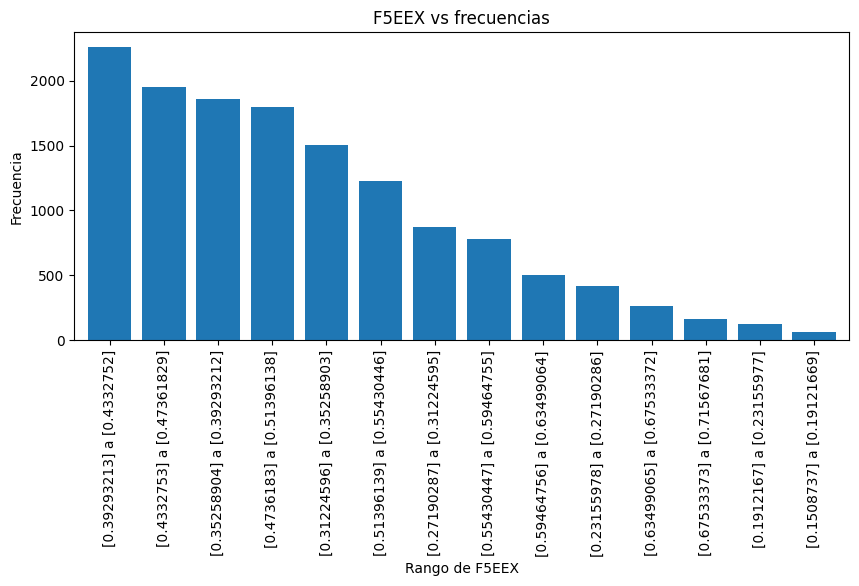

Tabla de frecuencia para la variable: F6EES:
F6EES
[0.36894729] a [0.40940546]    2180
[0.40940547] a [0.44986364]    2042
[40940546] a [0.49032183]      1961
[0.49032184] a [0.53078001]    1650
[0.3284892] a [0.36894728]     1521
[0.53078002] a [0.57123819]    1290
[0.28803093] a [0.3284891]      900
[0.5712382] a [0.61169637]      855
[0.61169638] a [0.65215456]     425
[0.24757274] a [0.28803092]     390
[0.65215457] a [0.69261274]     263
[0.69261275] a [0.73307092]     136
[0.20711456] a [0.24757273]     124
[0.16665638] a [0.20711455]      66
Name: count, dtype: int64
_______________________________



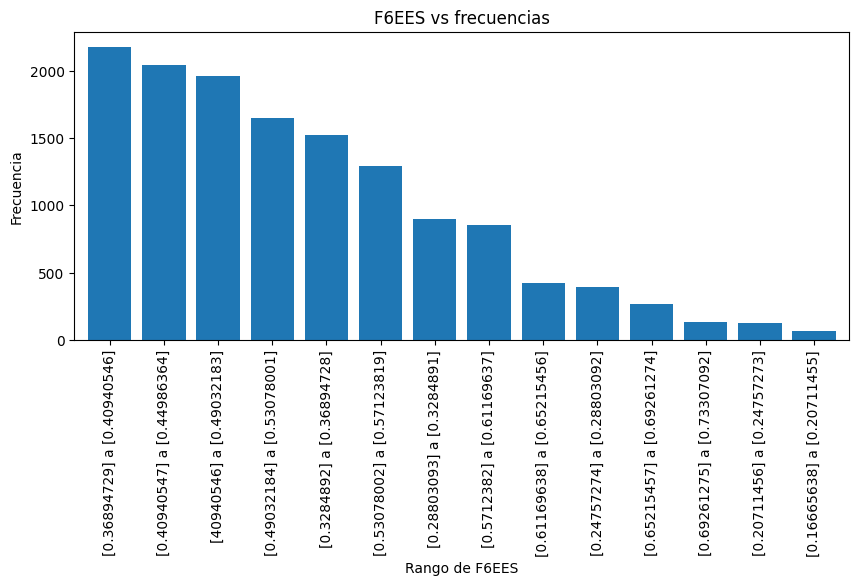

Tabla de frecuencia para la variable: F8EIX:
F8EIX
[0.30338999] a [0.44383953]    6066
[0.44383954] a [0.58428907]    5330
[0.58428908] a [0.72473861]    1374
[0.16294044] a [0.30338998]    1033
Name: count, dtype: int64
_______________________________



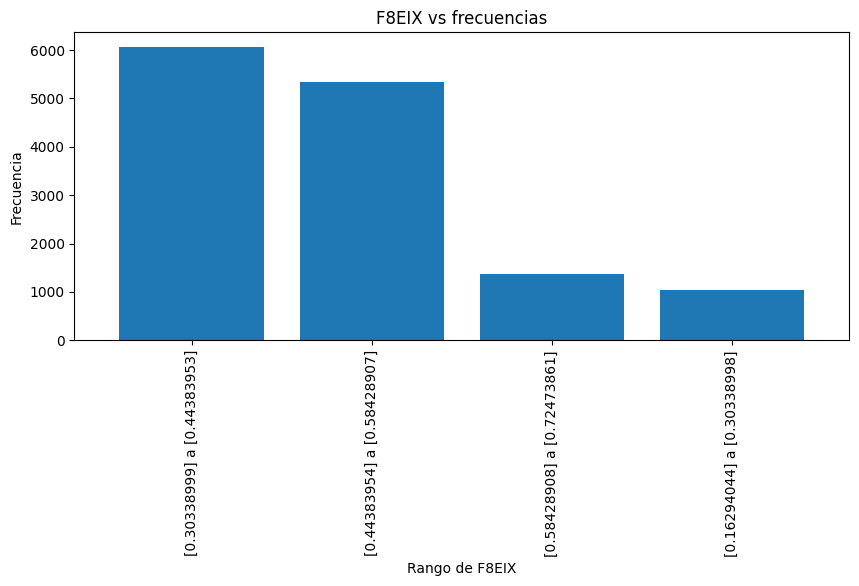

Tabla de frecuencia para la variable: F7EIS:
F7EIS
[0.37602195] a [0.4121859]     2428
[0.412186] a [0.44834985]      1988
[0.33985799] a [0.37602194]    1831
[0.44834986] a [0.48451381]    1650
[0.30369404] a [0.33985798]    1444
[0.48451382] a [0.52067776]    1226
[0.26753008] a [0.30369403]     841
[0.52067777] a [0.55684172]     786
[0.23136612] a [0.26753007]     485
[0.55684173] a [0.59300568]     480
[0.59300569] a [0.62916963]     265
[0.19520217] a [0.23136611]     175
[0.62916964] a [0.66533359]     146
[0.15903821]-[0.19520216]        58
Name: count, dtype: int64
_______________________________



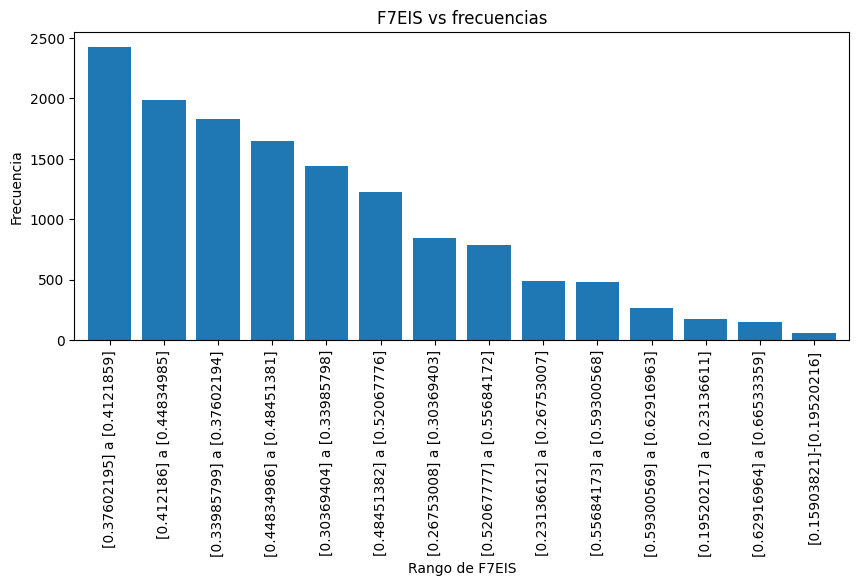

Tabla de frecuencia para la variable: F9EEX:
F9EEX
[0.40530123] a [0.44872951]    2073
[0.44872952] a [0.4921578]     2027
[0.36187293] a [0.40530122]    1947
[0.4921579] a [0.5355861]      1765
[0.5355862] a [0.57901439]     1414
[0.31844464] a [0.36187292]    1410
[0.27501635] a [0.31844463]     941
[0.57901440] a [0.62244268]     687
[0.62244269] a [0.66587097]     456
[0.23158806] a [0.27501634]     388
[0.66587098] a [0.70929927]     269
[0.18815976] a [0.23158805]     231
[0.70929928] a [0.75272756]     119
[0.14473147] a [0.18815975]      76
Name: count, dtype: int64
_______________________________



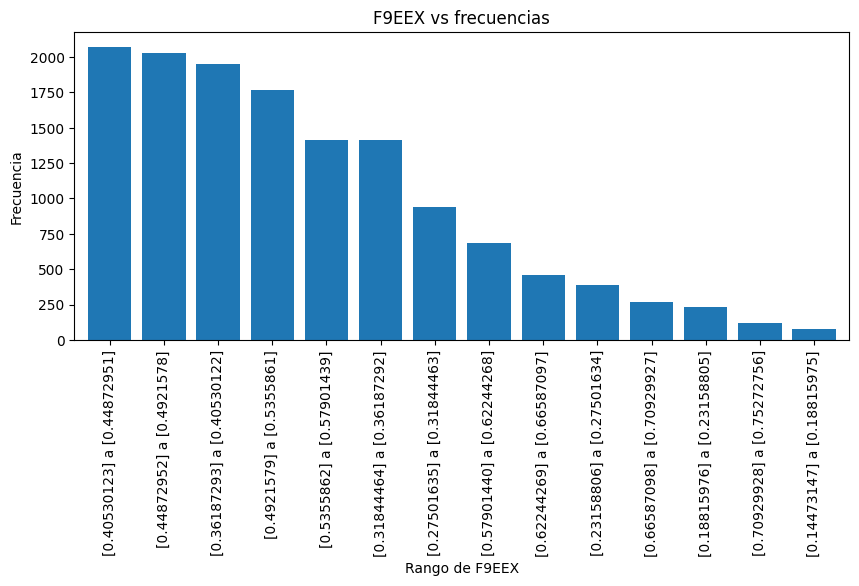

Tabla de frecuencia para la variable: F10ES:
F10ES
[0.48301203] a [0.5224025]     2177
[0.44362155] a [0.48301202]    2117
[0.40423108] a [0.44362154]    2016
[0.5224026] a [0.56179297]     1564
[0.3648406] a [0.40423107]     1379
[0.56179298] a [0.60118345]    1330
[0.60118346] a [0.64057393]     848
[0.32545012] a [0.36484059]     839
[0.64057394] a [0.67996441]     476
[0.28605964] a [0.32545011]     409
[0.67996442] a [0.71935488]     216
[0.24666917] a [0.28605963]     208
[0.71935489] a [0.75874536]     142
[0.20727869] a [0.24666916]      82
Name: count, dtype: int64
_______________________________



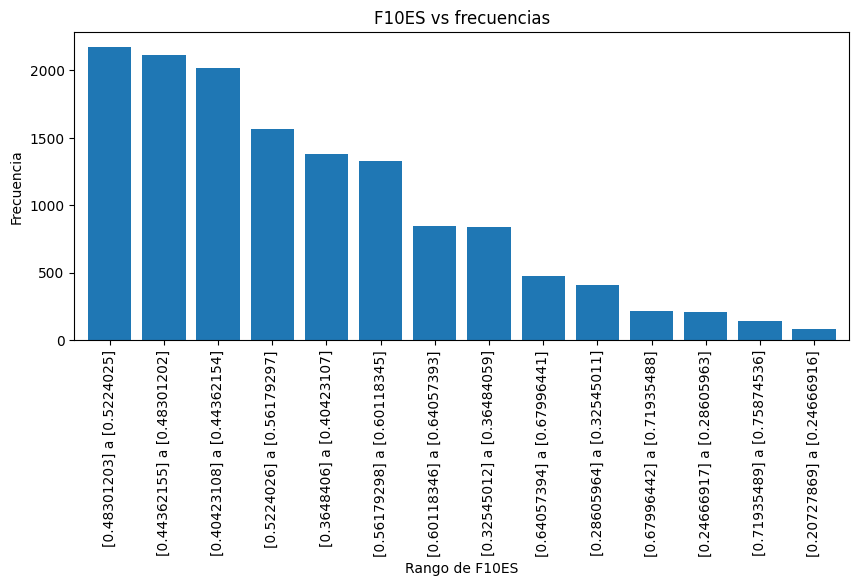

Tabla de frecuencia para la variable: F11EX:
F11EX
[0.41907747] a [0.45591284]    2112
[0.45591285] a [0.49274823]    1939
[0.38224208] a [0.41907746]    1906
[0.49274824] a [0.52958362]    1876
[0.34540669] a [0.38224207]    1342
[0.52958363] a [0.56641901]    1177
[0.30857130] a [0.34540668]     870
[0.56641902] a [0.6032544]      848
[0.27173592] a [0.30857129]     501
[0.6032545] a [0.64008978]      491
[0.64008979] a [0.67692517]     278
[0.23490053]-[0.27173591]       233
[0.67692518] a [0.71376056]     166
[0.19806514]-[0.23490052]        64
Name: count, dtype: int64
_______________________________



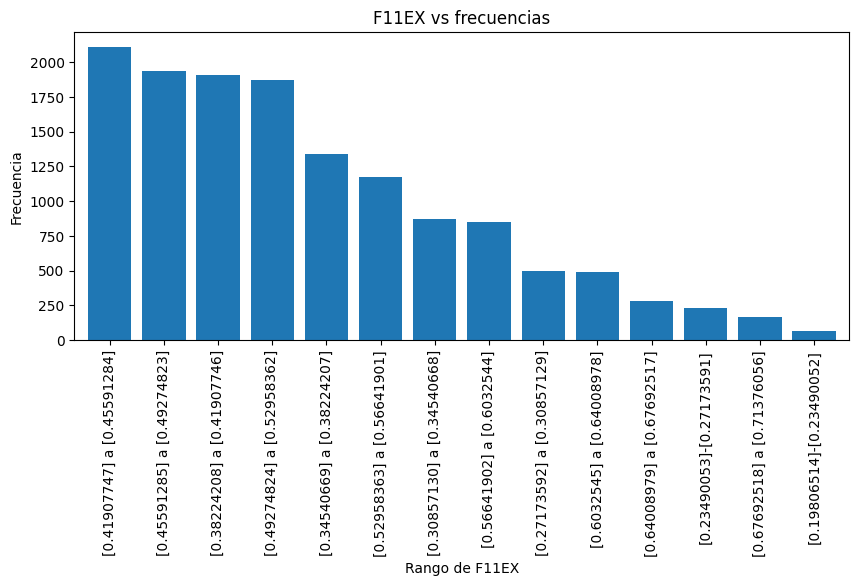

Tabla de frecuencia para la variable: F12ES:
F12ES
[0.42649127] a [0.51007797]    4340
[0.51007798] a [0.59366469]    3082
[0.34290455] a [0.42649126]    2972
[0.25931784]-[0.34290454]      1502
[0.5936647] a [0.6772514]      1293
[0.6772515] a [0.76083812]      380
[0.17573112]-[0.25931783]       234
Name: count, dtype: int64
_______________________________



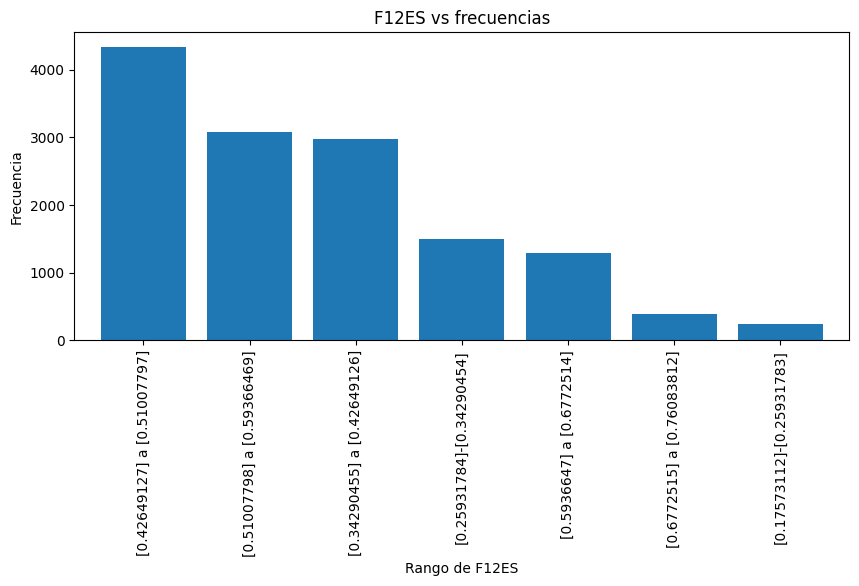

Tabla de frecuencia para la variable: F13EV:
F13EV
[0.41452265] a [0.51556063]    3929
[0.31348465] a [0.41452264]    3372
[0.51556064] a [0.61659863]    3158
[0.21244666]-[0.31348464]      1680
[0.61659864] a [0.71763662]    1126
[0.71763663] a [0.81867462]     352
[0.11140866]-[0.21244665]       186
Name: count, dtype: int64
_______________________________



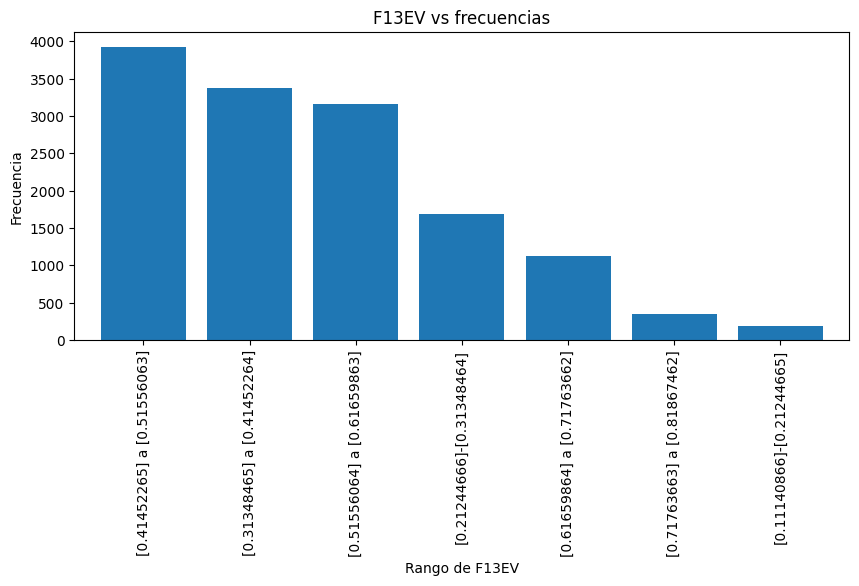

Tabla de frecuencia para la variable: F14EV:
F14EV
[0.40288125] a [0.50615246]    3751
[0.29961003] a [0.40288124]    3521
[0.50615247] a [0.60942368]    2509
[0.19633880]-[0.29961002]      2183
[0.60942369] a [0.71269491]    1174
[0.09306758]-[0.19633879]       354
[0.71269492] a [0.81596613]     311
Name: count, dtype: int64
_______________________________



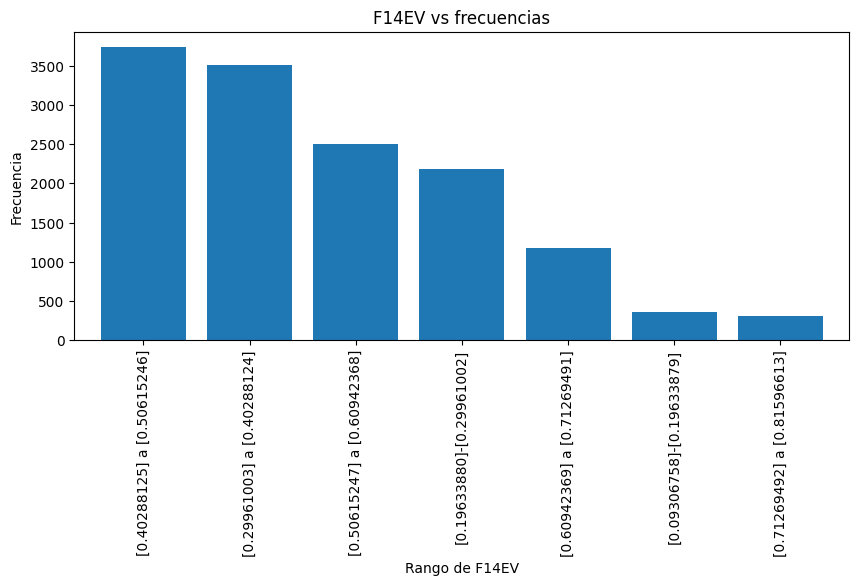

Tabla de frecuencia para la variable: F17MS:
F17MS
[0.29291599] a [0.39723543]    6280
[0.18859655] a [0.29291598]    3651
[0.39723544] a [0.50155487]    2719
[0.50155489] a [0.60587432]     688
[0.0842771] a [0.18859654]      465
Name: count, dtype: int64
_______________________________



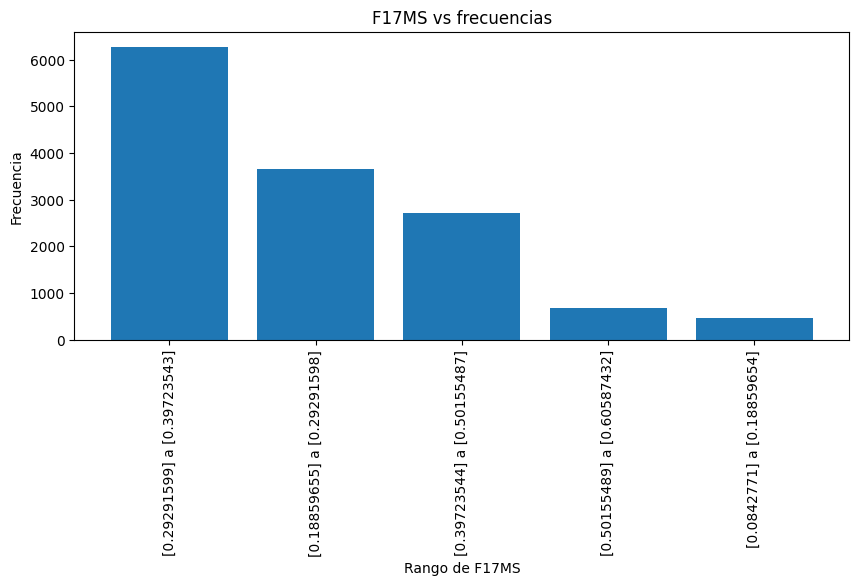

Tabla de frecuencia para la variable: F18MX:
F18MX
[0.30346904] a [0.42289473]    4689
[0.42289474] a [0.54232042]    4123
[0.18404333] a [0.30346903]    2178
[0.54232043] a [0.66174612]    1912
[0.06461764] a [0.18404333]     497
[0.66174613] a [0.78117182]     404
Name: count, dtype: int64
_______________________________



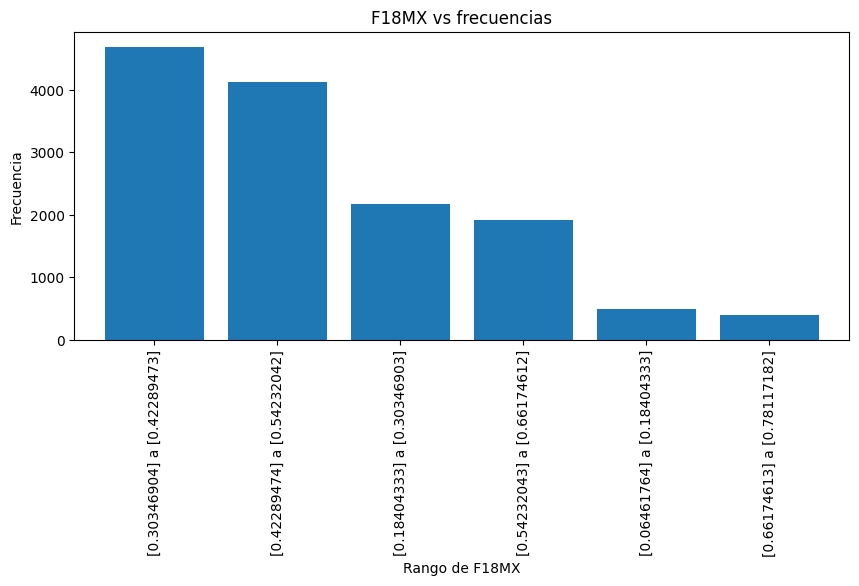

Tabla de frecuencia para la variable: F15MS:
F15MS
[0.34708597] a [0.45685788]    4237
[0.45685789] a [0.5666298]     3682
[0.23731405] a [0.34708596]    3204
[0.5666299] a [0.67640172]     1452
[0.12754213] a [0.23731404]     966
[0.67640173] a [0.78617364]     262
Name: count, dtype: int64
_______________________________



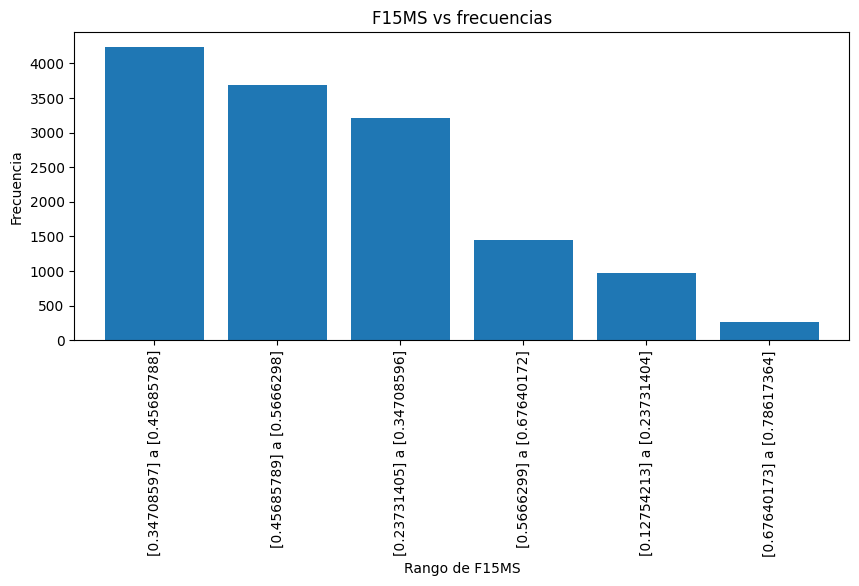

Tabla de frecuencia para la variable: F16MX:
F16MX
[0.46830259] a [0.56157661]    4271
[0.37502855] a [0.46830258]    3214
[0.56157662] a [0.65485065]    3180
[0.65485066] a [0.74812469]    1307
[0.28175456] a [0.37502854]    1017
[0.18848047] a [0.2817545]      556
[0.7481247] a [0.84139873]      258
Name: count, dtype: int64
_______________________________



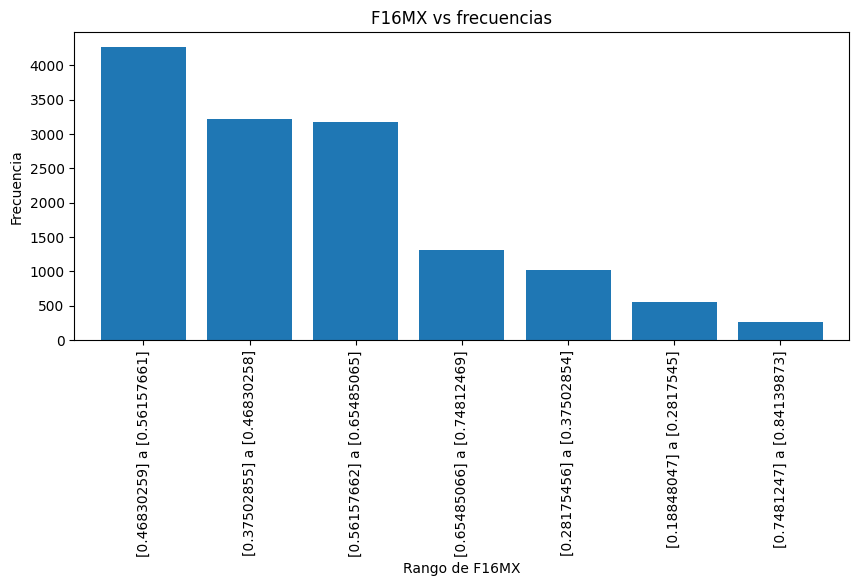

Tabla de frecuencia para la variable: F19MH:
F19MH
[0.36713165] a [0.46220022]     4472
[0.46220023] a [0.55726879]     4292
[0.55726880] a [0.65233736]     1966
[0.27206307] a [0.36713164]     1945
[0.0.1769945] a [0.27206306]     566
[0.65233737] a [0.74740594]      562
Name: count, dtype: int64
_______________________________



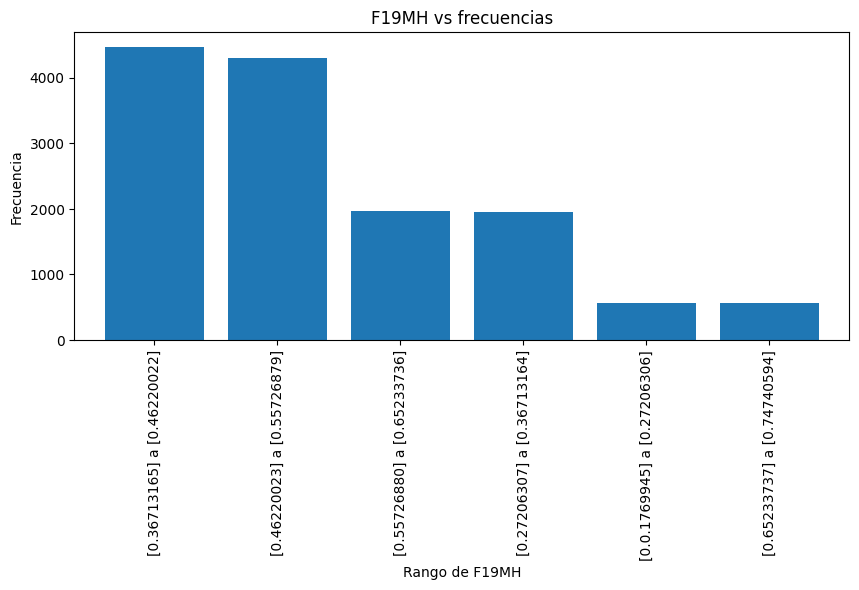

Tabla de frecuencia para la variable: F20MH:
F20MH
[0.1789177] a [0.28865284]     4181
[0.28865285] a [0.39838799]    4170
[0.398388] a [0.50812315]      3167
[0.50812316] a [0.6178583]     1254
[0.06918255] a [0.17891769]     541
[0.6178584] a [0.72759345]      490
Name: count, dtype: int64
_______________________________



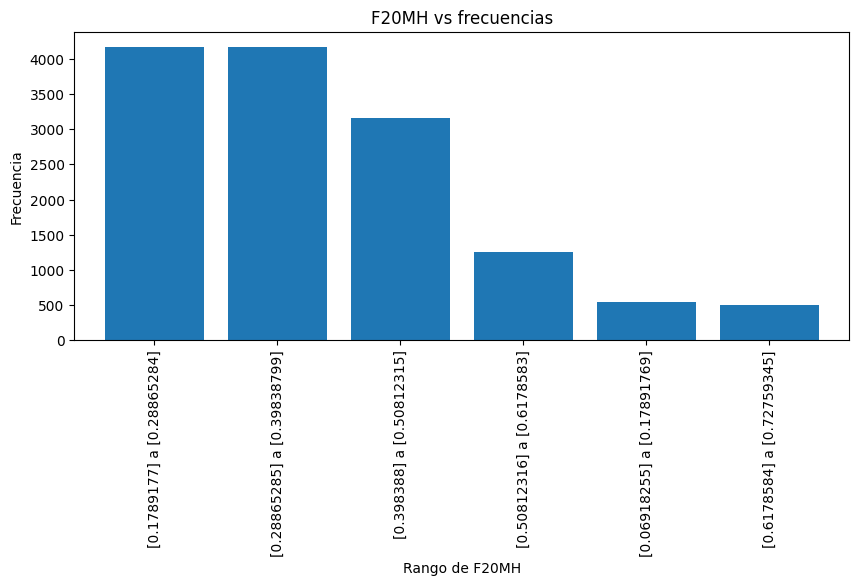

Tabla de frecuencia para la variable: F1EBX:
F1EBX
[0.43260353] a [0.52525959]    4376
[0.5252596] a [0.61791566]     3515
[0.33994746] a [0.43260352]    2463
[0.2472914] a [0.33994745]     1520
[0.61791567] a [0.71057172]    1169
[0.15463533] a [0.24729139]     560
[0.71057172] a [0.80322779]     200
Name: count, dtype: int64
_______________________________



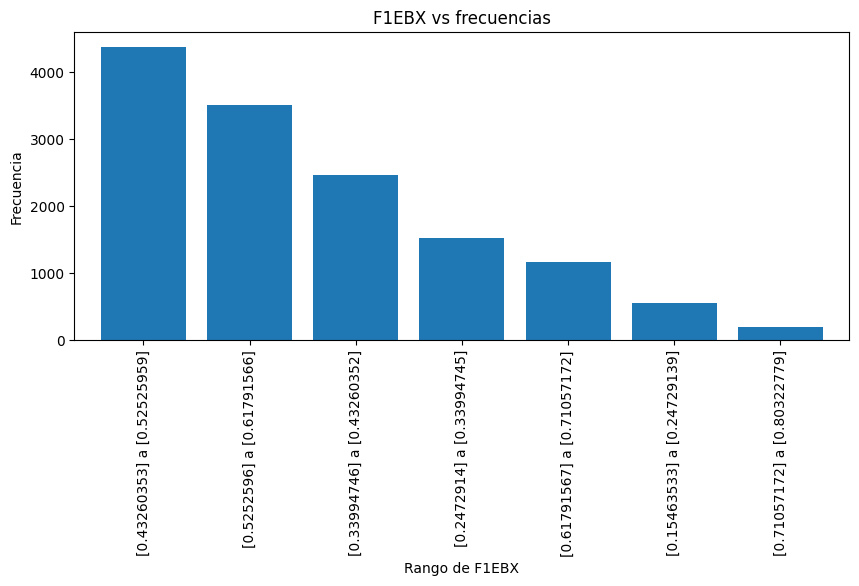

Tabla de frecuencia para la variable: F2EBS:
F2EBS
[0.48372946] a [0.5786926]    4833
[0.3887664] a [0.48372945]    4101
[0.5786927] a [0.67365575]    2010
[0.29380316] a [0.3887663]    1328
[0.19885] a [0.29380315]      1082
[0.67365576] a [0.7686189]     449
Name: count, dtype: int64
_______________________________



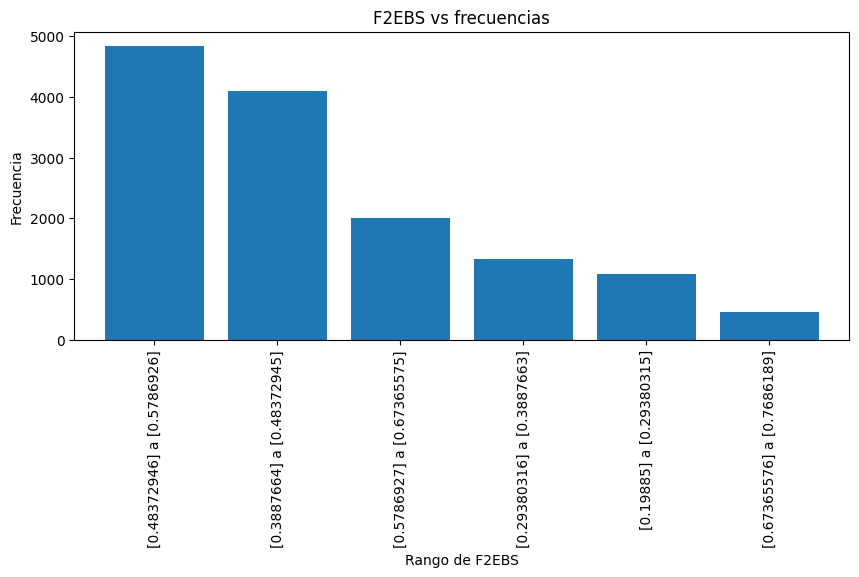

Tabla de frecuencia para la variable: F4EBX:
F4EBX
[0.4120602] a [0.52475091]     4899
[0.29936929] a [0.4120601]     3819
[0.18667848] a [0.29936928]    2555
[0.52475092] a [0.63744172]    1724
[0.07398767] a [0.18667847]     606
[0.63744173] a [0.75013253]     200
Name: count, dtype: int64
_______________________________



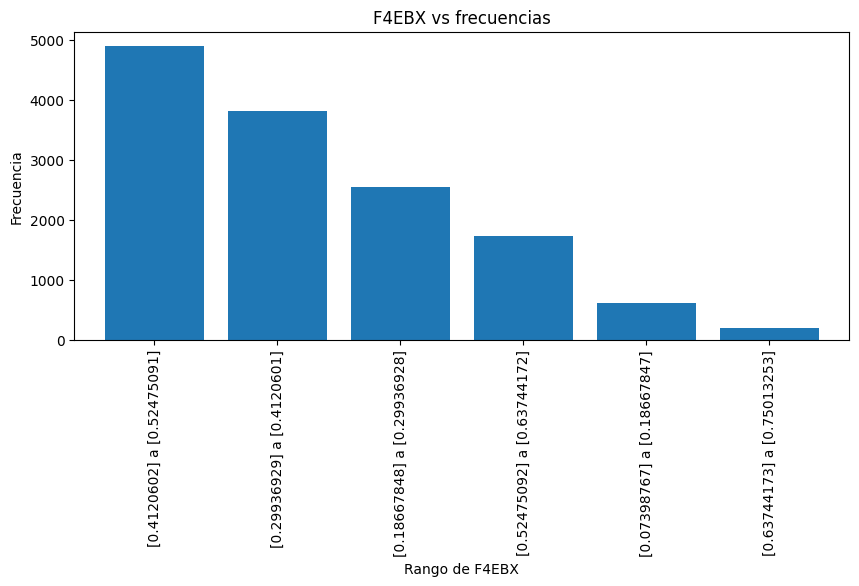

Tabla de frecuencia para la variable: F3EBS:
F3EBS
[0.33690822] a [0.44954182]    5458
[0.22427462] a [0.33690821]    3739
[0.44954183] a [0.56217542]    2598
[0.111642] a [0.22427461]      1537
[0.56217543] a [0.67480903]     471
Name: count, dtype: int64
_______________________________



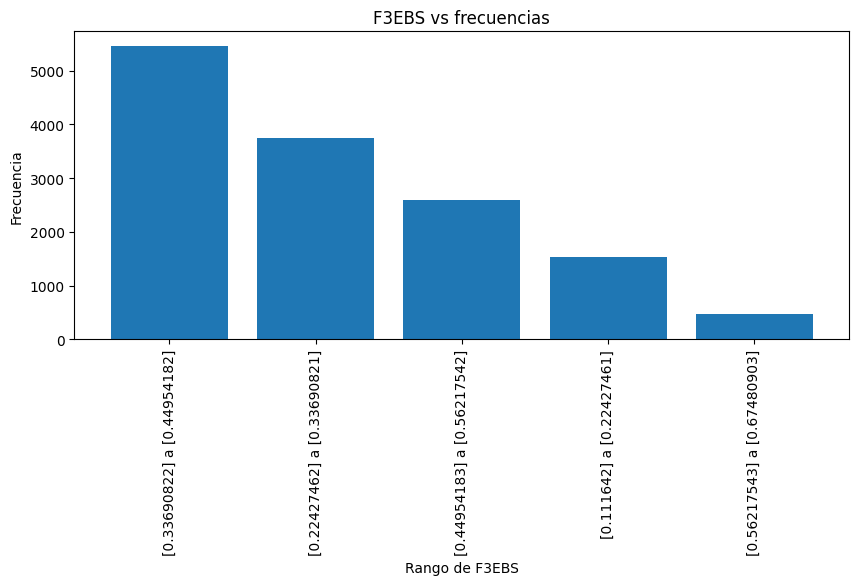

In [129]:
import matplotlib.pyplot as plt

# Función para crear tabla de frecuencia
def freq_tbl(series):
    """
    Crea una tabla de frecuencia para una serie de datos.

    Parámetros:
    series (pd.Series): Serie de datos para la cual se crea la tabla de frecuencia.

    Retorna:
    pd.Series: Tabla de frecuencia para la serie de datos.
    """
    return series.value_counts()

# Obtener los nombres de las columnas
x = categoricas.columns

# Iterar a través de cada columna e imprimir la tabla de frecuencia
for i in x:
    table1 = freq_tbl(categoricas[i])
    table1.index.name = i  # Asignar el nombre del índice
    print(f"Tabla de frecuencia para la variable: {i}:\n{table1}\n_______________________________\n")

    # Realizamos gráfico de barras del DF filtrado
    # Asumiendo que 'Filtro_index' es el resultado que deseas graficar
    # Asegúrate de que 'Filtro_index' esté definido antes de esta línea
    Filtro_index = table1  # Esto es solo un ejemplo; ajusta según tu lógica
    Filtro_index.plot(kind='bar', width=0.8, figsize=(10, 4))
    plt.title(f'{i} vs frecuencias')
    plt.xlabel(f'Rango de {i}')
    plt.ylabel('Frecuencia')
    plt.show()  # Muestra el gráfico

# **Corroboramos Nulos**

In [130]:
#Ajustar maximo de filas
pd.options.display.max_rows=None

In [131]:
#Corroboramos valores nulos
valores_nulos=categoricas.isnull().sum()
valores_nulos

,0
F5EEX,0
F6EES,0
F8EIX,0
F7EIS,0
F9EEX,0
F10ES,0
F11EX,0
F12ES,0
F13EV,0
F14EV,0


In [132]:
categoricas.to_csv('df_SF_CATEGROIZADAS.csv')